This notebook generates the plots in **Figure 5**,**Figure 7**,**Figure 9**,**Figure 11**, and **Figure 13**, starting from the CSV generated by the RunExperiments notebook.

## Import Required Libraries
Running cell below will import the required libraries being used in the rest of the cells of this notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import math
import os
pd.set_option('display.max_columns', None)
import datetime
from matplotlib import rc
rc('text',usetex=True)
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
rc('text.latex', preamble='\\usepackage{color} \\usepackage{amsmath} \\usepackage{amssymb}')

# Select and load the CSV (linear model, ResNet50 model)

In [2]:
# exp_no = 'E1'
exp_no = 'E2'
# exp_no = 'E3'
# exp_no = 'E7'

USE_SOFTMAX= False

model_softmax = 'softmax' if USE_SOFTMAX else 'logits'

In [3]:
from dataclasses import dataclass

@dataclass
class Parameters:
    dummy                   : bool  = False
    exp_no                  : str   = exp_no         
    model_type              : str   = ''
    pretrained_model_type   : str   = ''
    background_type         : str   = ''
params = Parameters()


In [4]:
def get_params_from_exp(params):
    if params.exp_no=='E1':
        params.model_type              = 'real'
        params.pretrained_model_type   = 'resnet'      
        params.background_type         = 'gray'
    elif params.exp_no=='E7':
        params.model_type              = 'real'
        params.pretrained_model_type   = 'vit'      
        params.background_type         = 'gray'
    elif params.exp_no=='E2':
        params.model_type              = 'ideal'
        params.pretrained_model_type   = 'resnet'      
        params.background_type         = 'gray'
        params.file_name               = 'exp_E2'
    elif params.exp_no=='E3':
        params.model_type              = 'real'
        params.pretrained_model_type   = 'swin_trans_vit'      
        params.background_type         = 'gray'
    elif params.exp_no=='E5':
        params.model_type              = 'real'
        params.pretrained_model_type   = 'resnet'      
        params.background_type         = 'full'
    return params

params = get_params_from_exp(params)
params.file_name = f'exp_{params.exp_no}'

def get_exp_header():
    print('='*95)
    print('| ',f'{"MODEL_TYPE":15}','|',f'{"PRETRAINED_MODEL":22}','|',f'{"BACKGROUND_TYPE":22}','|',f'{"FILENAME":22}','|')
    print('-'*95)
    print('| ',f'{params.model_type:15}','|',f'{params.pretrained_model_type:22}','|',f'{params.background_type:22}','|',f'{params.file_name:22}','|')

get_exp_header()


|  MODEL_TYPE      | PRETRAINED_MODEL       | BACKGROUND_TYPE        | FILENAME               |
-----------------------------------------------------------------------------------------------
|  ideal           | resnet                 | gray                   | exp_E2                 |


In [5]:
get_exp_header()

|  MODEL_TYPE      | PRETRAINED_MODEL       | BACKGROUND_TYPE        | FILENAME               |
-----------------------------------------------------------------------------------------------
|  ideal           | resnet                 | gray                   | exp_E2                 |


# Path Setting
**NOTE** Comment uncomment LINE No 4,5 to change dataset path

In [6]:
suffix_full      = f'{params.model_type}_{params.background_type}'
DS_name_annotation    = 'ImageNetS'
DS_name_img           = 'ImageNet'

subset_type = 'im50'
    
path_notebook = os.path.abspath(os.path.join(os.getcwd(), os.pardir))


codes_path    = os.getcwd() 
results_path    = os.path.join(codes_path,'results')

if params.model_type=='real':
    results_path    = os.path.join(results_path,params.pretrained_model_type)
    suffix                     = f'{params.pretrained_model_type}_{params.model_type}_{params.background_type}'
else:
    results_path    = os.path.join(results_path)

suffix                     = f'{params.model_type}_{params.background_type}'

results_path            = os.path.join(results_path,    suffix)
path_csv                = os.path.join(codes_path,       'results')

# path_csv    = '../results_logits_with_auc_clipped/'
path_boxplot            = os.path.join(codes_path,   'boxplot')
os.makedirs(path_boxplot,              exist_ok=True)
suffix

'ideal_gray'

In [7]:
def get_file_modify_time(filepath=None):
    from datetime import datetime
    if os.path.exists(filepath):
        datestamp  = datetime.fromtimestamp(os.path.getmtime(filepath))
        print('File Exists :', filepath)
        print('File Date/Time :', datestamp)

In [8]:
path_csv

'e:\\Cloud\\RashidPHD\\Supplimentary_Files\\AAAI_26\\notebooks\\E1_E2_E3_E7\\results'

In [9]:
print(params.pretrained_model_type)
print(suffix)
print(exp_no)
# csv_filename = f'{path_csv}/{params.pretrained_model_type}/{params.pretrained_model_type}_{suffix}/csv_exp_{exp_no}_{DS_name_img}_{params.pretrained_model_type}_{suffix}_{model_softmax}.csv'
csv_filename = f'{path_csv}/csv_exp_{exp_no}_{DS_name_img}_{params.pretrained_model_type}_{suffix}_{model_softmax}.csv'


print(csv_filename, os.path.exists(csv_filename))
if os.path.exists(csv_filename):
    print(f'Loading CSV file: {csv_filename}')

else:
    print(f'CSV file does not exist: {csv_filename}')
    raise FileNotFoundError(f'CSV file does not exist: {csv_filename}')

resnet
ideal_gray
E2
e:\Cloud\RashidPHD\Supplimentary_Files\AAAI_26\notebooks\E1_E2_E3_E7\results/csv_exp_E2_ImageNet_resnet_ideal_gray_logits.csv False
CSV file does not exist: e:\Cloud\RashidPHD\Supplimentary_Files\AAAI_26\notebooks\E1_E2_E3_E7\results/csv_exp_E2_ImageNet_resnet_ideal_gray_logits.csv


FileNotFoundError: CSV file does not exist: e:\Cloud\RashidPHD\Supplimentary_Files\AAAI_26\notebooks\E1_E2_E3_E7\results/csv_exp_E2_ImageNet_resnet_ideal_gray_logits.csv

In [10]:
get_file_modify_time(filepath=csv_filename)

File Exists : E:\Cloud\RashidPHD\Supplimentary_Files\AAAI_26\notebooks\E1_E2_E3_E7\results\resnet\resnet_ideal_gray/csv_convergencce_exp_E2_ImageNet_resnet_ideal_gray_logits.csv
File Date/Time : 2025-11-11 01:29:46.946724


In [11]:
df,model,background = pd.read_csv(csv_filename), params.model_type,params.background_type

In [12]:
print('loaded file with images', len(df.image.unique()), 'images')

loaded file with images 574 images


In [13]:
df.method = df.method.apply(lambda x: x.replace('Partition', 'AA'))
print(df.method.unique())
df.head(3)


['BPT-100' 'BPT-200' 'BPT-300' 'BPT-400' 'BPT-500' 'BPT-600' 'BPT-700'
 'BPT-800' 'BPT-900' 'BPT-1000' 'BPT-1100' 'BPT-1200' 'BPT-1300'
 'BPT-1400' 'BPT-1500' 'BPT-1600' 'BPT-1700' 'BPT-1800' 'BPT-1900'
 'BPT-2000' 'AA-100' 'AA-200' 'AA-300' 'AA-400' 'AA-500' 'AA-600' 'AA-700'
 'AA-800' 'AA-900' 'AA-1000' 'AA-1100' 'AA-1200' 'AA-1300' 'AA-1400'
 'AA-1500' 'AA-1600' 'AA-1700' 'AA-1800' 'AA-1900' 'AA-2000']


,Unnamed: 0,image,id,pred_cls,pred_lbl,f_S,f_0,delta_f,f_G,f_B,f_T,f_N,method,aucI_pred,aucD_pred,aucI_r,aucD_r,aucI_adj,aucD_adj,aucI_adj_r,aucD_adj_r,aucI_clip,aucI_clipr,aucD_clip,aucD_clipr,threshold,best_point,max_IoU,au_IoU,time_load,time_exp,time_auc_IoU,time_total
0,0,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,11,BPT-100,5.649315,1.085765,0.817016,0.157026,5.670747,1.104468,0.820116,0.159731,5.660031,0.818566,0.843682,0.122015,0.000239,0.135304,0.332377,0.189322,0.199084,0.348210,0.240170,0.900651
1,1,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,14,BPT-200,5.948193,1.007613,0.860241,0.145723,5.959385,1.014613,0.861859,0.146736,5.953789,0.861050,0.649315,0.093905,0.000356,0.144452,0.333440,0.203784,0.199084,0.469788,0.162690,0.934824
2,2,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,16,BPT-300,5.979617,0.976189,0.864785,0.141179,5.990809,0.983189,0.866404,0.142191,5.985213,0.865595,0.617891,0.089361,0.000350,0.118622,0.365714,0.208105,0.199084,0.747597,0.183313,1.231525


In [14]:
df.method = df.method.apply(lambda x: x.replace('ShapGradE', 'GradShap'))
df

,Unnamed: 0,image,id,pred_cls,pred_lbl,f_S,f_0,delta_f,f_G,f_B,f_T,f_N,method,aucI_pred,aucD_pred,aucI_r,aucD_r,aucI_adj,aucD_adj,aucI_adj_r,aucD_adj_r,aucI_clip,aucI_clipr,aucD_clip,aucD_clipr,threshold,best_point,max_IoU,au_IoU,time_load,time_exp,time_auc_IoU,time_total
0,0,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,11,BPT-100,5.649315,1.085765,0.817016,0.157026,5.670747,1.104468,0.820116,0.159731,5.660031,0.818566,0.843682,0.122015,0.000239,0.135304,0.332377,0.189322,0.199084,0.348210,0.240170,0.900651
1,1,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,14,BPT-200,5.948193,1.007613,0.860241,0.145723,5.959385,1.014613,0.861859,0.146736,5.953789,0.861050,0.649315,0.093905,0.000356,0.144452,0.333440,0.203784,0.199084,0.469788,0.162690,0.934824
2,2,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,16,BPT-300,5.979617,0.976189,0.864785,0.141179,5.990809,0.983189,0.866404,0.142191,5.985213,0.865595,0.617891,0.089361,0.000350,0.118622,0.365714,0.208105,0.199084,0.747597,0.183313,1.231525
3,3,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,18,BPT-400,6.040764,0.948304,0.873629,0.137146,6.051956,0.955044,0.875247,0.138121,6.046360,0.874438,0.573245,0.082904,0.000260,0.151467,0.387291,0.214592,0.199084,0.682116,0.169294,1.175339
4,4,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,20,BPT-500,6.101384,0.980440,0.882396,0.141793,6.112576,0.983955,0.884014,0.142302,6.106980,0.883205,0.557231,0.080588,0.000396,0.151367,0.387201,0.216448,0.199084,0.743609,0.270991,1.411938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22955,22955,ILSVRC2012_val_00048751,574,992,agaric,6.413660,-1.181038,7.594697,0.0,6.413660,6.413660,29,AA-1600,6.796627,1.979362,0.894918,0.260624,6.796627,1.979362,0.894918,0.260624,6.796627,0.894918,1.979362,0.260624,0.000193,0.218491,0.584828,0.374025,0.125159,0.222825,0.097478,0.505990
22956,22956,ILSVRC2012_val_00048751,574,992,agaric,6.413660,-1.181038,7.594697,0.0,6.413660,6.413660,30,AA-1700,6.801385,1.974339,0.895544,0.259963,6.801385,1.974339,0.895544,0.259963,6.801385,0.895544,1.974339,0.259963,0.000193,0.234116,0.593488,0.374427,0.125159,0.249894,0.101261,0.532886
22957,22957,ILSVRC2012_val_00048751,574,992,agaric,6.413660,-1.181038,7.594697,0.0,6.413660,6.413660,31,AA-1800,6.801745,1.973818,0.895591,0.259894,6.801745,1.973818,0.895591,0.259894,6.801745,0.895591,1.973818,0.259894,0.000193,0.234116,0.593488,0.374628,0.125159,0.304176,0.096280,0.587235
22958,22958,ILSVRC2012_val_00048751,574,992,agaric,6.413660,-1.181038,7.594697,0.0,6.413660,6.413660,32,AA-1900,6.804401,1.970961,0.895941,0.259518,6.804401,1.970961,0.895941,0.259518,6.804401,0.895941,1.970961,0.259518,0.000193,0.234116,0.593488,0.375083,0.125159,0.271743,0.095982,0.552496


In [15]:
NEW_exp = False

EXP_with_convergence = True



In [16]:
if not NEW_exp:
    df.method = df.method.apply(lambda x: x.replace('LIME-50', 'LIME-250'))
    df.method = df.method.apply(lambda x: x.replace('LIME-100', 'LIME-500'))
    df.method = df.method.apply(lambda x: x.replace('LIME-200', 'LIME-1000'))

In [17]:
def inspect_df(df):
    computed_methods = df.method.unique()
    num_methods = len(computed_methods)
    num_images  = len(np.unique(df.image))
    return computed_methods,num_methods,num_images

In [18]:
computed_methods,num_methods,num_images = inspect_df(df)
print(num_methods,computed_methods)
print('-'*120)
print(f'Total Images: {num_images}')

40 ['BPT-100' 'BPT-200' 'BPT-300' 'BPT-400' 'BPT-500' 'BPT-600' 'BPT-700'
 'BPT-800' 'BPT-900' 'BPT-1000' 'BPT-1100' 'BPT-1200' 'BPT-1300'
 'BPT-1400' 'BPT-1500' 'BPT-1600' 'BPT-1700' 'BPT-1800' 'BPT-1900'
 'BPT-2000' 'AA-100' 'AA-200' 'AA-300' 'AA-400' 'AA-500' 'AA-600' 'AA-700'
 'AA-800' 'AA-900' 'AA-1000' 'AA-1100' 'AA-1200' 'AA-1300' 'AA-1400'
 'AA-1500' 'AA-1600' 'AA-1700' 'AA-1800' 'AA-1900' 'AA-2000']
------------------------------------------------------------------------------------------------------------------------
Total Images: 574


In [19]:
# df = df[df.method != 'LRP']

if params.model_type=='ideal':
    df = df[df.method != 'LRP']
    df = df[df.method != 'GradShap']
    df = df[df.method != 'GradCAM']

In [20]:
computed_methods,num_methods,num_images = inspect_df(df)
print(num_methods,computed_methods)
print('-'*120)
print(f'Total Images: {num_images}')

40 ['BPT-100' 'BPT-200' 'BPT-300' 'BPT-400' 'BPT-500' 'BPT-600' 'BPT-700'
 'BPT-800' 'BPT-900' 'BPT-1000' 'BPT-1100' 'BPT-1200' 'BPT-1300'
 'BPT-1400' 'BPT-1500' 'BPT-1600' 'BPT-1700' 'BPT-1800' 'BPT-1900'
 'BPT-2000' 'AA-100' 'AA-200' 'AA-300' 'AA-400' 'AA-500' 'AA-600' 'AA-700'
 'AA-800' 'AA-900' 'AA-1000' 'AA-1100' 'AA-1200' 'AA-1300' 'AA-1400'
 'AA-1500' 'AA-1600' 'AA-1700' 'AA-1800' 'AA-1900' 'AA-2000']
------------------------------------------------------------------------------------------------------------------------
Total Images: 574


In [21]:
get_exp_header()

|  MODEL_TYPE      | PRETRAINED_MODEL       | BACKGROUND_TYPE        | FILENAME               |
-----------------------------------------------------------------------------------------------
|  ideal           | resnet                 | gray                   | exp_E2                 |


In [22]:
df.method.unique()

array(['BPT-100', 'BPT-200', 'BPT-300', 'BPT-400', 'BPT-500', 'BPT-600',
       'BPT-700', 'BPT-800', 'BPT-900', 'BPT-1000', 'BPT-1100',
       'BPT-1200', 'BPT-1300', 'BPT-1400', 'BPT-1500', 'BPT-1600',
       'BPT-1700', 'BPT-1800', 'BPT-1900', 'BPT-2000', 'AA-100', 'AA-200',
       'AA-300', 'AA-400', 'AA-500', 'AA-600', 'AA-700', 'AA-800',
       'AA-900', 'AA-1000', 'AA-1100', 'AA-1200', 'AA-1300', 'AA-1400',
       'AA-1500', 'AA-1600', 'AA-1700', 'AA-1800', 'AA-1900', 'AA-2000'],
      dtype=object)

In [116]:
name_remap = {
    'Partition-100': 'PE-100',
    'Partition-500': 'PE-500',
    'Partition-1000': 'PE-1000',
    'BPT-100': '\\bf BPT-100',
    'BPT-500': '\\bf BPT-500',
    'BPT-1000': '\\bf BPT-1000',
    'aIDG': '$|$IDG$|$',
    'aGradExpl': '$|$GradExpl$|$',
}
method_remap = {
    'max_IoU': '$max$-$IoU$',
    'au_IoU': '$AU$-$IoU$',
    'aucI_pred': '$\\mathit{AUC}^+$',
    'aucD_pred': '$\\mathit{AUC}^-$',
    'aucI_mse': '$\\mathit{MSE}^+$',
    'aucD_mse': '$\\mathit{MSE}^-$',
    'time_exp': 'log(time)'
}
method_colors = {
    'BPT-100':         '#f2a7c0',
    'BPT-500':         '#db587f',
    'BPT-1000':        '#9d2f4d',
    'AA-100':   '#4ed1f9',
    'AA-500':   '#00b1f2',
    'AA-1000':  '#008fe8',
    'AA-5000':  '#006bd7',
    'AA-10000':  '#3245bd',
    'LIME-100':         '#c7e883',
    'LIME-500':        '#8fc543',
    'LIME-1000':        '#66912d',
    'LRP':        '#008080',
    'GradCAM':         'xkcd:camel',
    'aIDG':            '#fcd459',
    'aGradExpl':       '#dd7c2b',
    'GradShap':       '#800000',
}
method_symbol = {
    'BPT-100'   :       '$\\clubsuit$1',
    'BPT-500'   :       '$\\clubsuit$2',
    'BPT-1000'  :       '$\\clubsuit$3',
    'AA-100'    :       '$\\boxplus$1',
    'AA-500'    :       '$\\boxplus$2',
    'AA-1000'   :       '$\\boxplus$3',
    'AA-5000'   :       '$\\boxplus$4',
    'AA-10000'  :       '$\\boxplus$5',
    'LIME-100'   :       '\\textbf{0}1',
    'LIME-500'  :      '\\textbf{0}2',
    'LIME-1000'  :      '\\textbf{0}3',
    'LRP'       :      '\\textbf{$\\Pi$}',
    'GradCAM'   :      '$\\bigtriangledown$',
    'aIDG'      :      '$\\divideontimes$',
    'aGradExpl' :     '$\\bigtriangleup$',
    'GradShap':       '$\\square$',
}

method_to_shortname = {}
for i,m in enumerate(method_colors.keys()):
    method_to_shortname[m] = f'{method_symbol[m]}'
    print(f'{m:15} : {method_to_shortname[m]}')

BPT-100         : $\clubsuit$1
BPT-500         : $\clubsuit$2
BPT-1000        : $\clubsuit$3
AA-100          : $\boxplus$1
AA-500          : $\boxplus$2
AA-1000         : $\boxplus$3
AA-5000         : $\boxplus$4
AA-10000        : $\boxplus$5
LIME-100        : \textbf{0}1
LIME-500        : \textbf{0}2
LIME-1000       : \textbf{0}3
LRP             : \textbf{$\Pi$}
GradCAM         : $\bigtriangledown$
aIDG            : $\divideontimes$
aGradExpl       : $\bigtriangleup$
GradShap        : $\square$


# Plot Results

In [117]:
# if model_type =='ideal':
#     file_name = 'results_E2'
# elif model_type =='real':
#     if pretrained_model_type=='resnet' and background_type=='gray':
#         file_name = 'results_E1'
#     if pretrained_model_type=='vgg16':
#         file_name = 'results_E4'
#     if pretrained_model_type=='swin_trans_vit':
#         file_name = 'results_E5'
#     if background_type=='full':
#         file_name = 'results_E3'
print('='*125)
print('| ',f'{"MODEL_TYPE":15}','|',f'{"PRETRAINED_MODEL":22}','|',f'{"BACKGROUND_TYPE":22}','|',f'{"FILENAME":22}','|',f'{"num_methods":<12}','|',f'{"num_images":12}','|')
print('-'*125)
print('| ',f'{params.model_type:15}','|',f'{params.pretrained_model_type:22}','|',f'{params.background_type:22}','|',f'{params.file_name:22}','|',f'{num_methods:<12}','|',f'{num_images:12}','|')

|  MODEL_TYPE      | PRETRAINED_MODEL       | BACKGROUND_TYPE        | FILENAME               | num_methods  | num_images   |
-----------------------------------------------------------------------------------------------------------------------------
|  ideal           | resnet                 | gray                   | exp_E2                 | 40           |          574 |


## Figure 4: E1, E2

In [118]:
for m in df.method.unique():
    if m not in method_colors:
        print(f'WARNING: {m} not in method_colors')
        continue
    if m not in method_to_shortname:
        print(f'WARNING: {m} not in method_to_shortname')
        continue

print('='*120)
for m in method_colors:
    if m not in df.method.unique():
        print(f'WARNING: {m} not in df.method.unique()')
        continue
    if m not in method_to_shortname:
        print(f'WARNING: {m} not in method_to_shortname')
        continue

In [27]:
df

,Unnamed: 0,image,id,pred_cls,pred_lbl,f_S,f_0,delta_f,f_G,f_B,f_T,f_N,method,aucI_pred,aucD_pred,aucI_r,aucD_r,aucI_adj,aucD_adj,aucI_adj_r,aucD_adj_r,aucI_clip,aucI_clipr,aucD_clip,aucD_clipr,threshold,best_point,max_IoU,au_IoU,time_load,time_exp,time_auc_IoU,time_total
0,0,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,11,BPT-100,5.649315,1.085765,0.817016,0.157026,5.670747,1.104468,0.820116,0.159731,5.660031,0.818566,0.843682,0.122015,0.000239,0.135304,0.332377,0.189322,0.199084,0.348210,0.240170,0.900651
1,1,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,14,BPT-200,5.948193,1.007613,0.860241,0.145723,5.959385,1.014613,0.861859,0.146736,5.953789,0.861050,0.649315,0.093905,0.000356,0.144452,0.333440,0.203784,0.199084,0.469788,0.162690,0.934824
2,2,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,16,BPT-300,5.979617,0.976189,0.864785,0.141179,5.990809,0.983189,0.866404,0.142191,5.985213,0.865595,0.617891,0.089361,0.000350,0.118622,0.365714,0.208105,0.199084,0.747597,0.183313,1.231525
3,3,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,18,BPT-400,6.040764,0.948304,0.873629,0.137146,6.051956,0.955044,0.875247,0.138121,6.046360,0.874438,0.573245,0.082904,0.000260,0.151467,0.387291,0.214592,0.199084,0.682116,0.169294,1.175339
4,4,ILSVRC2012_val_00004677,1,1,goldfish,7.596925,0.682357,6.914568,0.0,7.596925,7.596925,20,BPT-500,6.101384,0.980440,0.882396,0.141793,6.112576,0.983955,0.884014,0.142302,6.106980,0.883205,0.557231,0.080588,0.000396,0.151367,0.387201,0.216448,0.199084,0.743609,0.270991,1.411938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22955,22955,ILSVRC2012_val_00048751,574,992,agaric,6.413660,-1.181038,7.594697,0.0,6.413660,6.413660,29,AA-1600,6.796627,1.979362,0.894918,0.260624,6.796627,1.979362,0.894918,0.260624,6.796627,0.894918,1.979362,0.260624,0.000193,0.218491,0.584828,0.374025,0.125159,0.222825,0.097478,0.505990
22956,22956,ILSVRC2012_val_00048751,574,992,agaric,6.413660,-1.181038,7.594697,0.0,6.413660,6.413660,30,AA-1700,6.801385,1.974339,0.895544,0.259963,6.801385,1.974339,0.895544,0.259963,6.801385,0.895544,1.974339,0.259963,0.000193,0.234116,0.593488,0.374427,0.125159,0.249894,0.101261,0.532886
22957,22957,ILSVRC2012_val_00048751,574,992,agaric,6.413660,-1.181038,7.594697,0.0,6.413660,6.413660,31,AA-1800,6.801745,1.973818,0.895591,0.259894,6.801745,1.973818,0.895591,0.259894,6.801745,0.895591,1.973818,0.259894,0.000193,0.234116,0.593488,0.374628,0.125159,0.304176,0.096280,0.587235
22958,22958,ILSVRC2012_val_00048751,574,992,agaric,6.413660,-1.181038,7.594697,0.0,6.413660,6.413660,32,AA-1900,6.804401,1.970961,0.895941,0.259518,6.804401,1.970961,0.895941,0.259518,6.804401,0.895941,1.970961,0.259518,0.000193,0.234116,0.593488,0.375083,0.125159,0.271743,0.095982,0.552496


In [28]:
method_remap = {
    'max_IoU': '$max$-$IoU$',
    'au_IoU': '$AU$-$IoU$',
    'aucI_pred': '$\\mathit{AUC}^+$',
    'aucD_pred': '$\\mathit{AUC}^-$',
    'aucI_adj': '$\\mathit{AUC}^+-Adju$',
    'aucD_adj': '$\\mathit{AUC}^--Adju$',
    
    'aucI_r': '$\\mathit{AUC}^+-R$',
    'aucD_r': '$\\mathit{AUC}^--R$',

    'aucI_adj_r': '$\\mathit{AUC}^+-Adju-R$',
    'aucD_adj_r': '$\\mathit{AUC}^--Adju-R$',



    'time_exp': 'log(time)'
}

In [29]:
print(len(df.image.unique()))
print(len(df.method.unique()))

574
40


In [30]:
method_remap = {
    'max_IoU': '$max$-$IoU$',
    'au_IoU': '$AU$-$IoU$',
    'aucI_pred': '$\\mathit{AUC}^+$',
    'aucD_pred': '$\\mathit{AUC}^-$',
    'aucI_adj': '$\\mathit{AUC}^+-Adju$',
    'aucD_adj': '$\\mathit{AUC}^--Adju$',
    
    'aucI_r': '$\\mathit{AUC}^+-R$',
    'aucD_r': '$\\mathit{AUC}^--R$',

    'aucI_adj_r': '$\\mathit{AUC}^+-Adju-R$',
    'aucD_adj_r': '$\\mathit{AUC}^--Adju-R$',


    'aucI_clip': '$\\mathit{AUC}^+-Cl$',
    'aucI_clipr': '$\\mathit{AUC}^+-Cl-R$',

    'aucD_clip': '$\\mathit{AUC}^--Cl$',
    'aucD_clipr': '$\\mathit{AUC}^--Cl-R$',

# aucI_clip, aucI_clipr	aucD_clip aucD_clipr


    'time_exp': 'log(time)'
}

In [31]:
if exp_no=='E3':
    suffix = 'SwinViT'

filename_boxplots = f'{path_boxplot}/results_{params.exp_no}_{suffix}'
print(filename_boxplots)

e:\Cloud\RashidPHD\Supplimentary_Files\AAAI_26\notebooks\E1_E2_E3_E7\boxplot/results_E2_ideal_gray


Exp No E2
Total Images: 574
XAI Methods: 40
Total Time: 		 4:11:42.549937


KeyError: 'AA-200'

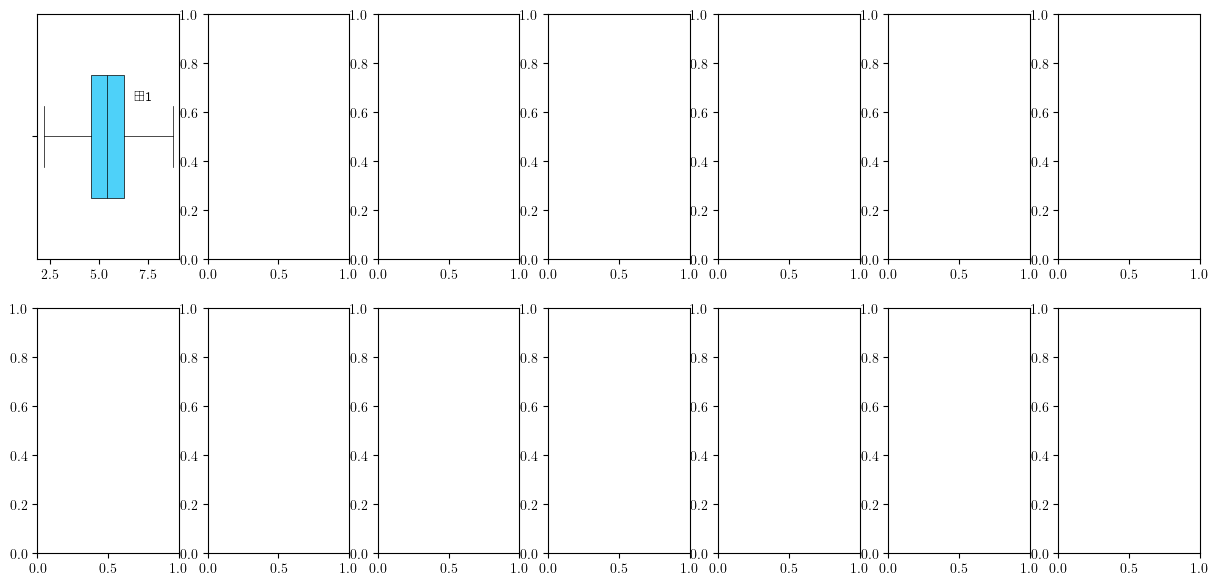

In [119]:
def box_plot(ax, data, label, position, edge_color, line_width, fill_color):
    bp = ax.boxplot(data,
                    # labels=[label],
                    tick_labels=[label],
                    positions=[position], vert=False, 
                    widths=0.5, whis=5, patch_artist=True, flierprops={'markersize': 1, 'markerfacecolor':'magenta', 'markeredgecolor':'magenta'}) # 
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, linewidth=line_width)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp


# auc_methods      = ['aucI_pred', 'aucD_pred', 'aucI_adj', 'aucD_adj', 'aucI_r','aucD_r',\
#                     'aucI_adj_r','aucD_adj_r', 'max_IoU', 'au_IoU', 'time_exp']

auc_methods      = ['aucI_pred','aucI_clip' , 'aucI_adj' , 'aucI_r', 'aucI_adj_r', 'max_IoU','time_exp',\
                    'aucD_pred','aucD_clipr', 'aucD_adj' , 'aucD_r', 'aucD_adj_r','au_IoU',\
                    ]

auc_method_ascending = ['aucI_pred','aucI_clip','aucI_adj','aucI_r', 'aucI_adj_r','max_IoU', 'au_IoU' ]

total_images = len(df.image.unique())
total_methods = len(df.method.unique())
ttl_cols = len(auc_methods) if len(auc_methods)%2==0 else len(auc_methods)+1 


print('Exp No', exp_no)
print(f'Total Images: {total_images}')
print(f'XAI Methods: {total_methods}')
# print('Background type:\t',background_type)

print('Total Time: \t\t',str(datetime.timedelta(seconds=np.sum(df.time_total))))

fig, axes = plt.subplots(2, int(ttl_cols/2), figsize=(15, 7))  # (rows, cols)
for j, score in enumerate(auc_methods):
    row, col = divmod(j, int(ttl_cols/2))
    ax = axes[row, col]
    # df = df[~df[score].isna()] 
    # df = df
    ascending = score in auc_method_ascending
    means = df.groupby('method')[[score]].median() \
              .sort_values(score, ascending=ascending).index
    log_scale = (score=='time_exp')
    ax.set_xscale('log' if log_scale else 'linear')
    for i, method in enumerate(means):
        text_yincrement = -0.3
        values = df[ df.method==method ][score]
        values = values[~values.isna()]
        name = name_remap[method] if method in name_remap else method
        color = method_colors[method]
        q75 = np.quantile(values, q=0.75)
        q100 = np.quantile(values, q=1.0)
        if not log_scale and 'IoU' not in score and q100>1.0:
            q100, text_yincrement = 0.82, 0.15
        val_arr = [[v for v in values]]
        box_plot(ax, val_arr, '', i, 
                 'blue' if method.startswith('BPT') else 'black', 
                 1.5 if method.startswith('BPT') else 0.5,
                 color)
        # print(method,q100,score,np.max(values))
        if score in ['aucI_pred', 'aucD_pred']:
            ax.text(min(q100*1.3, 30) if log_scale else q75+0.5, i+text_yincrement, method_to_shortname[method])
        elif score in ['aucI_mse', 'aucD_mse']:
            ax.text(min(q100*1.3, 30) if log_scale else q100+60, i+text_yincrement, method_to_shortname[method])
        else:
            ax.text(min(q100*1.3, 30) if log_scale else q100+0.05, i+text_yincrement, method_to_shortname[method])
    values = df[score]

    ##########################################
    # if score=='aucI_pred': min_x,max_x=  0,1.0 #-np.quantile(values,q=0.1),np.quantile(values,q=1)+(np.quantile(values,q=0)/np.quantile(values,q=1)*45)
    # if score=='aucI_pred': min_x,max_x= 0.01, 10

    
    
    if score=='aucI_r' : min_x,max_x= 0,1
    
    if score=='aucI_adj_r' : min_x,max_x= 0,1.5
    if score=='aucI_mse' : min_x,max_x= -np.quantile(values,q=0.01),400
    if score=='aucI_mse' : min_x,max_x= -np.quantile(values,q=0.01),400

    if score=='aucD_mse' : min_x,max_x= -np.quantile(values,q=0.01),400
    if score=='aucD_pred': min_x,max_x= 0,np.quantile(values,q=1)+(np.quantile(values,q=0)/np.quantile(values,q=1)*20)
    
    if score=='max_IoU'  : min_x,max_x= -np.quantile(values,q=0.01),np.quantile(values,q=1)+(np.quantile(values,q=0)/np.quantile(values,q=1)*20)
    if score=='au_IoU'   : min_x,max_x= -np.quantile(values,q=0.01),np.quantile(values,q=1)+(np.quantile(values,q=0)/np.quantile(values,q=1)*30)
    ##########################################
    # print(score,min_x, max_x)
    # if score=='max_IoU':
    #     print(min_x,max_x)
    if score=='time_exp' :
        min_x, max_x = 0.011, 99
        for m in [0.01, 0.1, 1, 10]:
            for k in range(1,10):
                ax.axvline(m*k, lw=0.5, color='grey', alpha=1/k)
        ax.set_xticks([0.1, 1, 10])
        ax.set_xticklabels(['0.1', '1', '10'])
    if score=='aucI_r' : 
        min_x,max_x= 0,1.5
        ax.set_xlim(min_x, max_x)
    # ax.set_xlim(min_x, max_x)
    ax.set_title(f"{method_remap[score]}", fontsize=15)

    ax.set_ylim(-0.7, i+0.8)
    ax.set_yticks([])

plt.subplots_adjust(wspace=0.10)
# filename_box_plot = f'{results_boxplots}/results_table_IoU_{len(np.unique(df.image))}_{len(methods)}_{background_type}'
if exp_no=='E1':
    plt.savefig(f'{filename_boxplots}.svg', dpi=150, transparent=True, bbox_inches='tight', pad_inches=0.02)
else:
    plt.savefig(f'{filename_boxplots}.pdf', dpi=150, transparent=True, bbox_inches='tight', pad_inches=0.02)


################################
from matplotlib.patches import Patch

last_ax = axes[-1, -1]  # bottom-right subplot

# Unique method list in the order you want
lm = list(df.method.unique())

# Create legend handles with real name + symbol
legend_handles = []
for m in lm:
    shortname = method_to_shortname.get(m, m)
    fullname = name_remap.get(m, m)
    label = f'{shortname}: {fullname}'
    patch = Patch(
        facecolor=method_colors[m],
        edgecolor='blue' if m.startswith('BPT') else 'black',
        linewidth=1.5 if m.startswith('BPT') else 0.5,
        label=label
    )
    legend_handles.append(patch)
for ti, tl in zip(('Total Images','XAI Methods'),(total_images,total_methods)):
    summary_patch = Patch(facecolor='white', edgecolor='white', label=[ti,tl])
    legend_handles.append(summary_patch)

# Add legend to bottom-right subplot (split in 2 columns)
last_ax.legend(
    handles=legend_handles,
    ncol=1,
    loc='center left',
    # bbox_to_anchor=(1.05, 0.5),
    fontsize=7,
    frameon=False
)
plt.suptitle(f'[Experiment:{exp_no}_{params.pretrained_model_type} ] --- [Total Images : {total_images}] --- [total_methods : {total_methods}]\
             --- [Total Time: {str(datetime.timedelta(seconds=np.sum(df.time_total)))}]', fontsize=16)
plt.show()
# print('file saved at :', filename_box_plot)

In [63]:
df['budget'] = df.method.apply(lambda name: int(name.split('-')[-1]))
df['variant'] = df.method.apply(lambda name: name.split('-')[0])


In [ ]:
method_remap = {
    'max_IoU': '$max$-$IoU$ (higher is better)',
    'au_IoU': '$AU$-$IoU$ (higher is better)',
    #--------------------------------
    'aucI_clipr': '$\\mathit{AUC}^+$ (higher is better)',
    'aucD_clipr': '$\\mathit{AUC}^-$ (lower is better)',
}

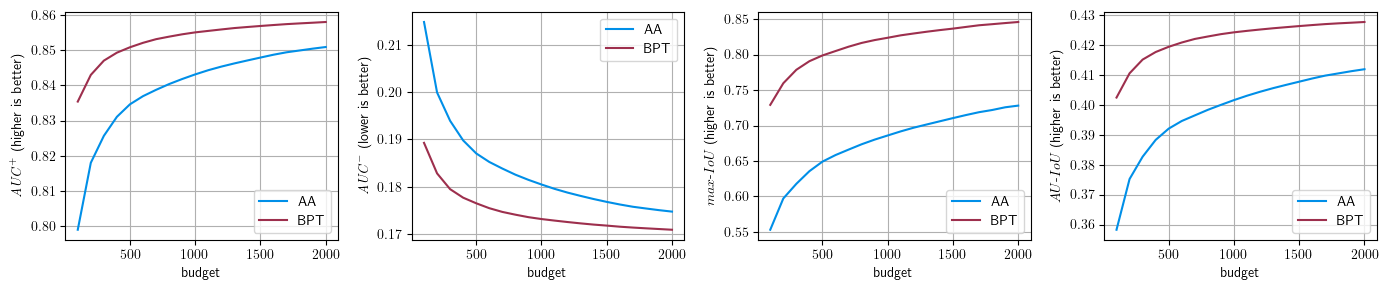

In [112]:
fig,axes = plt.subplots(1,4,figsize=(14,3))
for s_id,score in enumerate(['aucI_clipr','aucD_clipr', 'max_IoU', 'au_IoU']):
   for var in ['AA', 'BPT']:
      df2 = df[ df.variant==var ][[score, 'budget']].groupby('budget').mean().reset_index().sort_values('budget')
      # df3 = df[ df.variant==var ][['aucI_pred', 'budget']].groupby('budget').std().reset_index().sort_values('budget')
      X = df2.budget
      Y = df2[score]
      # err = df3[score]
      axes[s_id].plot(X, Y, label=var, c= method_colors_convergence[var])
      # plt.errorbar(X,Y, err, label=var)

   axes[s_id].set_ylabel(f'{method_remap[score]}')
   axes[s_id].set_xlabel(f'budget')
   axes[s_id].legend()
   axes[s_id].grid(True)
plt.tight_layout()
# plt.savefig(f'{filename_boxplots}_convergence.svg', dpi=150, transparent=True, bbox_inches='tight', pad_inches=0.02)
# plt.savefig(f'{filename_boxplots}_convergence.pdf', dpi=150, transparent=True, bbox_inches='tight', pad_inches=0.02)
# plt.savefig(f'{filename_boxplots}_convergence.png', dpi=150, transparent=True, bbox_inches='tight', pad_inches=0.02)
plt.show()

## FOR PAPER (SUPPLIMENTARY) ONLY

In [ ]:
method_remap = {
    'max_IoU': '$max$-$IoU$',
    'au_IoU': '$AU$-$IoU$',

    'aucI_clipr': '$\\mathit{AUC}^+$',
    'aucD_clipr': '$\\mathit{AUC}^-$',

    'time_exp': 'log(time)'
}

arrow_up = '$\\Uparrow$'
arrow_down = '$\\Downarrow$'
arrow = {

    'max_IoU': arrow_up,
    'au_IoU': arrow_up,
    'aucI_clipr': arrow_up,
    
    'aucD_clipr': arrow_down,
    'time_exp': arrow_down,
}

In [ ]:
exp_no

In [ ]:
def box_plot(ax, data, label, position, edge_color, line_width, fill_color):
    bp = ax.boxplot(data,
                    # labels=[label],
                    tick_labels=[label],
                    positions=[position], vert=False, 
                    widths=0.5, whis=5, patch_artist=True, flierprops={'markersize': 1, 'markerfacecolor':'magenta', 'markeredgecolor':'magenta'}) # 
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color, linewidth=line_width)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

auc_methods      = [
                    'aucI_clipr' ,'aucD_clipr', \
                    'max_IoU','au_IoU',\
                    'time_exp']

auc_method_ascending = ['aucI_clipr','aucI_clip','aucI_adj','aucI_r', 'aucI_adj_r','max_IoU', 'au_IoU' ]

total_images = len(df.image.unique())
total_methods = len(df.method.unique())
ttl_cols = len(auc_methods) if len(auc_methods)%2==0 else len(auc_methods)+1 

print('Exp No', exp_no)
print(f'Total Images: {total_images}')
print(f'XAI Methods: {total_methods}')

print('Total Time: \t\t',str(datetime.timedelta(seconds=np.sum(df.time_total))))

plot_width = 3 if exp_no!='E2' else 2.3

fig, axes = plt.subplots(1, len(auc_methods), figsize=(12, plot_width))  # (rows, cols)


for j, score in enumerate(auc_methods):
    # row, col = divmod(j, int(ttl_cols/2))
    ax = axes[j]
    # df = df[~df[score].isna()] 
    # df = df
    ascending = score in auc_method_ascending
    means = df.groupby('method')[[score]].median() \
              .sort_values(score, ascending=ascending).index
    log_scale = (score=='time_exp')
    ax.set_xscale('log' if log_scale else 'linear')
    for i, method in enumerate(means):
        text_yincrement = -0.3
        values = df[ df.method==method ][score]
        values = values[~values.isna()]
        name = name_remap[method] if method in name_remap else method
        color = method_colors[method]
        q75 = np.quantile(values, q=0.75)
        q100 = np.quantile(values, q=1.0)
        if not log_scale and 'IoU' not in score and q100>1.0:
            q100, text_yincrement = 0.82, 0.15
        val_arr = [[v for v in values]]
        box_plot(ax, val_arr, '', i, 
                 'blue' if method.startswith('BPT') else 'black', 
                 1.5 if method.startswith('BPT') else 0.5,
                 color)
        # print(method,q100,score,np.max(values))
        if score in ['aucI_pred', 'aucD_pred']:
            ax.text(min(q100*1.3, 30) if log_scale else q75+0.5, i+text_yincrement, method_to_shortname[method])
        elif score in ['aucI_mse', 'aucD_mse']:
            ax.text(min(q100*1.3, 30) if log_scale else q100+60, i+text_yincrement, method_to_shortname[method])
        else:
            ax.text(min(q100*1.3, 30) if log_scale else q100+0.05, i+text_yincrement, method_to_shortname[method])
    values = df[score]

    ##########################################

    if exp_no=='E3':
        if score=='aucI_clipr' : min_x,max_x= -0.05,1.2
        if score=='aucD_clipr' : min_x,max_x= -0.05,1.2
        if score=='max_IoU'  : min_x,max_x= -0.05,1.2 # 
        if score=='au_IoU'   : min_x,max_x= -0.05,0.75
    #-------------------------------------------------------
    elif exp_no=='E1':
        if score=='aucI_clipr' : min_x,max_x= 0.0,1.2
        if score=='aucD_clipr' : min_x,max_x= -0.05,1.3
        if score=='max_IoU'  : min_x,max_x= -0.05,1.2 # 
        if score=='au_IoU'   : min_x,max_x= -0.05,0.8
    #-------------------------------------------------------
    elif exp_no=='E1_ViT':
        if score=='aucI_clipr' : min_x,max_x= 0.0,1.2
        if score=='aucD_clipr' : min_x,max_x= -0.05,1.2
        if score=='max_IoU'  : min_x,max_x= -0.05,1.2 # 
        if score=='au_IoU'   : min_x,max_x= -0.05,0.8
    #-------------------------------------------------------
    else:
        if score=='aucI_clipr' : min_x,max_x= 0.4,1.2
        if score=='aucD_clipr' : min_x,max_x= -0.05,0.7
        if score=='max_IoU'  : min_x,max_x= 0,1.2 # 
        if score=='au_IoU'   : min_x,max_x= -0.05,0.8

    print(f'score {score}')

    ##########################################
    # print(score,min_x, max_x)
    # if score=='max_IoU':
    #     print(min_x,max_x)
    if score=='time_exp' :
        min_x, max_x = 0.011, 99
        for m in [0.01, 0.1, 1, 10]:
            for k in range(1,10):
                ax.axvline(m*k, lw=0.5, color='grey', alpha=1/k)
        ax.set_xticks([0.1, 1, 10])
        ax.set_xticklabels(['0.1', '1', '10'])
    if score=='aucI_r' : 
        min_x,max_x= 0,1.5
        ax.set_xlim(min_x, max_x)
    ax.set_xlim(min_x, max_x)
    ax.set_title(f"{arrow[score]} {method_remap[score]}", fontsize=15)

    ax.set_ylim(-0.7, i+0.8)
    ax.set_yticks([])

plt.subplots_adjust(wspace=0.10)
# filename_box_plot = f'{results_boxplots}/results_table_IoU_{len(np.unique(df.image))}_{len(methods)}_{background_type}'

# plt.savefig(f'{filename_boxplots}.pdf', dpi=150, transparent=True, bbox_inches='tight', pad_inches=0.02)
if exp_no=='E1':
    plt.savefig(f'{filename_boxplots}.svg', dpi=150, transparent=True, bbox_inches='tight', pad_inches=0.02)
else:
    plt.savefig(f'{filename_boxplots}.pdf', dpi=150, transparent=True, bbox_inches='tight', pad_inches=0.02)

plt.show()

## Remove Outlier

In [ ]:
values = df[df.method == method][score]

# Identify and remove the single largest outlier
q1 = np.percentile(values, 25)
q3 = np.percentile(values, 75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr  # Standard outlier threshold

# Remove the max value only if it's an outlier
if values.max() > upper_bound:
    values = values[values != values.max()]



# Save Legend

In [ ]:
plot_save_legend = True

## LEGEND FOR E1


In [ ]:
if plot_save_legend:
    legend_type = 'vertical'
    # legend_type = 'horizontal'

    legend_order_horizontal = [
                    ('BPT-100',  0),  ('BPT-500',    2),   ('BPT-1000', 4),
                    ('AA-100',   1),  ('AA-500',     3),   ('AA-1000', 5),    #('AA-5000', 7),  ('AA-10000', 9),
                    ('LIME-100',  6),  ('LIME-500',   8),   ('LIME-1000', 10),
                    ('aGradExpl',     7),   #12-> 7   ===   LRP -> aGradExpl
                    ('GradShap', 12), #13 -> 9
                    ('GradCAM', 9),  ('aIDG',      11),  
                    #  ('LRP', 13), # ===   aGradExpl - > LRP 
                    ]
    ###########################
    legend_order_vertical = [
                ('BPT-100',  0),  ('BPT-500',    1),   ('BPT-1000', 2),
                ('AA-100',   3),  ('AA-500',     4),   ('AA-1000', 5),    #('AA-5000', 7),  ('AA-10000', 9),
                ('LIME-100',  6),  ('LIME-500',   7),   ('LIME-1000', 8),
                ('LRP',     9),   #12-> 7
                ('GradShap', 10), #13 -> 9
                ('GradCAM', 11),  ('aIDG',      12),   ('aGradExpl', 13),
                ]
    ###########################
    if legend_type == 'horizontal':
        legend_order = legend_order_horizontal
    else:
        legend_order = legend_order_vertical

    lm = [None] * len(legend_order)
    
    for m,j in legend_order:
        lm[j] = m

In [ ]:
print(path_boxplot),suffix

In [ ]:
if plot_save_legend:
    plt.figure()
    handles = []
    for m in lm:
        
        name = name_remap[m] if m in name_remap else m
        print(name)
        p = mpatches.Patch(facecolor=method_colors[m], label=f'{method_to_shortname[m]}:{name}',
                           edgecolor='blue' if m.startswith('BPT') else 'black', 
                           linewidth=1.5 if m.startswith('BPT') else 0.5)
        handles.append(p)
    text_middle = f'Total Images: \t\t\t{len(np.unique(df.image))}\n Pretrained Model: \t{params.pretrained_model_type} \n background_type:\t{params.background_type}'
    plt.text(0.4,0.5, text_middle)
    
    if legend_type == 'horizontal':
        plt.legend(handles=handles, ncols=7, loc='upper left', bbox_to_anchor=(0.0, -0.08), 
               fancybox=True, shadow=True, handleheight=1, handlelength=1)
    else:
        plt.legend(handles=handles, ncols=1, loc='center left', bbox_to_anchor=(1.02, 0.5), 
               fancybox=True, shadow=True, handleheight=1, handlelength=1)
    plt.savefig(f'{path_boxplot}/result_table_legend_{params.exp_no}_{suffix}.svg', transparent=True, dpi=150, bbox_inches='tight', pad_inches=0.02)
    plt.show()
print(path_boxplot)

# ANOVA
Test statistical significance of the generated data.

- H0: All group means are equal.
- H1: At least one group mean is different from the rest, i.e. score populations are different.

In [ ]:
from scipy.stats import f_oneway

print('='*108)
print(f'| {"MODEL_TYPE":12} | {"PRETRAINED_MODEL":18} | {"BACKGROUND_TYPE":16} | {"Experiment":15} | {"num_images":<15} | {"num_methods":<13} |')
print('='*108)
print(f'| {params.model_type:12} | {params.pretrained_model_type:18} | {params.background_type:16} | {"file_name":15} | {num_images:<15} | {num_methods:<13} |')
print('-'*108)
print('='*80)
# print(f'| {"-"*20:20} | {"-"*25:25} | {"-"*25:25} | {"-"*25:25} |')
# print('='*108)

print(f'| {"METRIC":<20} | {"PVALUE":<53} |')
print('-'*108)
methods = sorted(df.method.unique())
for score in auc_methods:
    if score=='time_exp':
        continue
    pops = []
    for m1 in methods:
        pops.append(df[score][df.method==m1].values)
    
    anova = f_oneway(*pops)
    print(f"| {score:<20} | {anova.pvalue:<53} |")
print('-'*108)

In [ ]:
from scipy.stats import f_oneway

print('='*108)
print(f'| {"MODEL_TYPE":12} | {"PRETRAINED_MODEL":18} | {"BACKGROUND_TYPE":16} | {"Experiment":15} | {"num_images":<15} | {"num_methods":<13} |')

print(f'| {params.model_type:12} | {params.pretrained_model_type:18} | {params.background_type:16} | {"file_name":15} | {num_images:<15} | {num_methods:<13} |')
print('='*108)
# print(f'| {"-"*20:20} | {"-"*25:25} | {"-"*25:25} | {"-"*25:25} |')
# print('='*108)

print(f'| {"METRIC":<20} | {"SIGNIFICANCE":<25} | {"PVALUE":<53} |')
print('-'*108)
methods = sorted(df.method.unique())
for score in auc_methods:
    if score=='time_exp':
        continue
    pops = []
    for m1 in methods:
        pops.append(df[score][df.method==m1].values)
    
    anova = f_oneway(*pops)
    print(f"| {score:<20} | {'H1' if anova.pvalue<0.05 else 'H0':<25} | {anova.pvalue:<53} |")
print('-'*108)

# END